In [1]:
%pip install pandas matplotlib scipy seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Faysal\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Descriptive Analysis 1: Screen Time Distribution

Screen Time Statistics:
                C_we           C_wk           G_we           G_wk  \
count  113359.000000  113359.000000  113359.000000  113359.000000   
mean        2.188887       1.768854       1.739130       1.013082   
std         2.077960       1.734970       2.168335       1.554592   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.500000       0.500000       0.000000       0.000000   
50%         2.000000       1.000000       0.500000       0.000000   
75%         3.000000       3.000000       3.000000       2.000000   
max         7.000000       7.000000       7.000000       7.000000   

                S_we           S_wk           T_we           T_wk  
count  113359.000000  113359.000000  113359.000000  113359.000000  
mean        3.517004       2.910656       3.650932       2.567688  
std         2.497139       2.339170       1.954105       1.696659  
min         0.000000       0.000000       0.000000       0.000000  
25%         1.

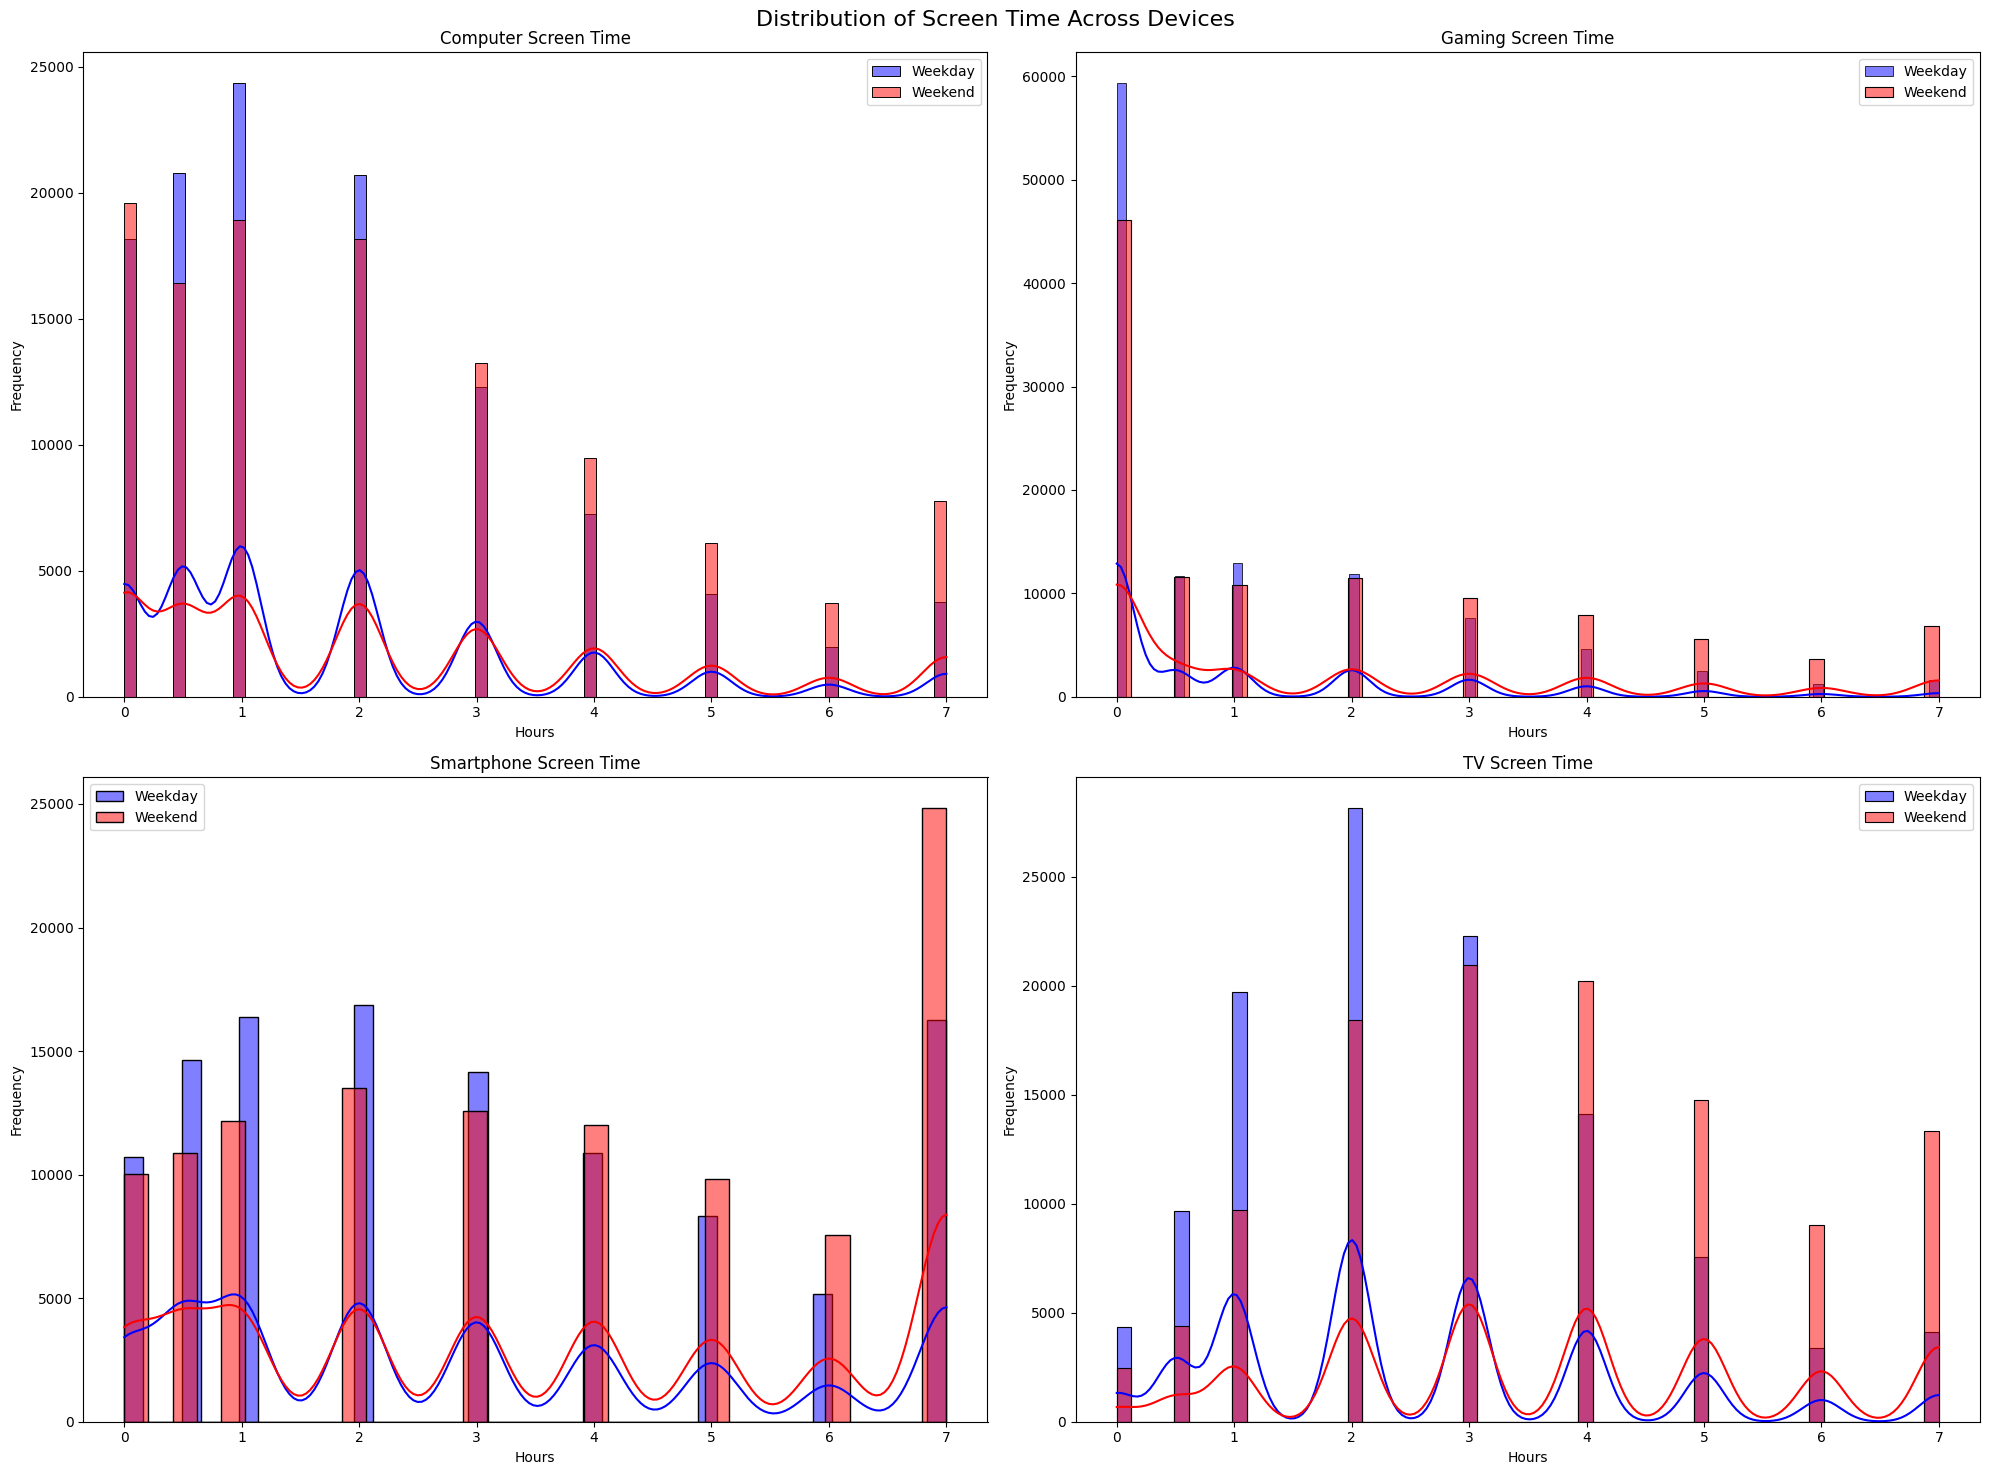


Average Daily Screen Time Statistics:
count    113359.000000
mean          9.070471
std           4.446206
min           0.000000
25%           5.857143
50%           8.357143
75%          11.571429
max          28.000000
Name: avg_daily_screen_time, dtype: float64


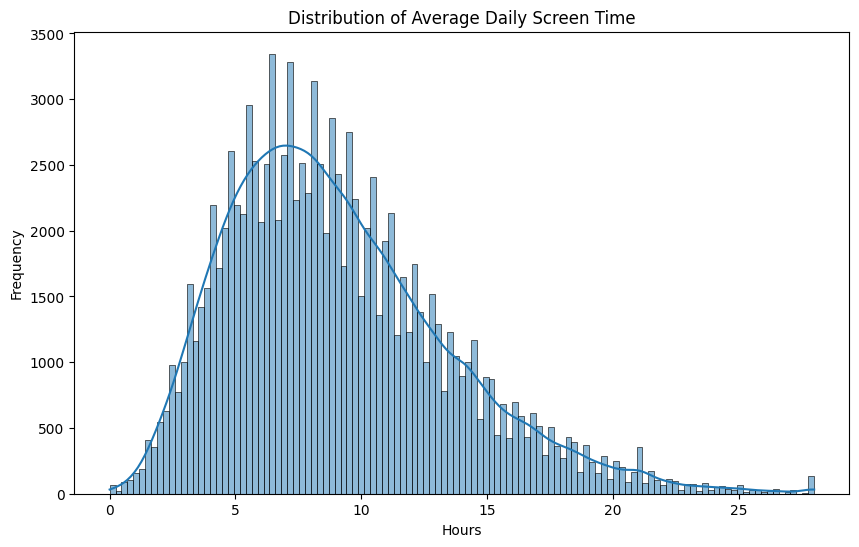

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset2 containing screen time data
dataset2 = pd.read_csv('dataset2.csv')

# Extract screen time columns
screen_time_cols = ['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']
screen_time_data = dataset2[screen_time_cols]

# Calculate summary statistics for screen time
screen_time_stats = screen_time_data.describe()
print("Screen Time Statistics:")
print(screen_time_stats)

# Create a figure with subplots for each screen time category
fig, axs = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Distribution of Screen Time Across Devices', fontsize=16)

devices = ['Computer', 'Gaming', 'Smartphone', 'TV']
for i, device in enumerate(devices):
    row = i // 2
    col = i % 2
    
    weekday_data = screen_time_data[f'{device[0]}_wk']
    weekend_data = screen_time_data[f'{device[0]}_we']
    
    sns.histplot(weekday_data, kde=True, color='blue', label='Weekday', ax=axs[row, col])
    sns.histplot(weekend_data, kde=True, color='red', label='Weekend', ax=axs[row, col])
    
    axs[row, col].set_title(f'{device} Screen Time')
    axs[row, col].set_xlabel('Hours')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

# Calculate average daily screen time
dataset2['avg_daily_screen_time'] = (
    (dataset2['C_wk'] * 5 + dataset2['C_we'] * 2 +
     dataset2['G_wk'] * 5 + dataset2['G_we'] * 2 +
     dataset2['S_wk'] * 5 + dataset2['S_we'] * 2 +
     dataset2['T_wk'] * 5 + dataset2['T_we'] * 2) / 7
)

print("\nAverage Daily Screen Time Statistics:")
print(dataset2['avg_daily_screen_time'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(dataset2['avg_daily_screen_time'], kde=True)
plt.title('Distribution of Average Daily Screen Time')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

# Descriptive Analysis 2: Well-Being Indicator Distribution

Well-Being Indicator Statistics:
                Optm           Usef           Relx           Intp  \
count  102580.000000  102580.000000  102580.000000  102580.000000   
mean        3.276087       3.107428       3.097826       3.272314   
std         0.997897       0.953128       1.015441       1.018537   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       3.000000       2.000000       3.000000   
50%         3.000000       3.000000       3.000000       3.000000   
75%         4.000000       4.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                Engs         Dealpr         Thcklr         Goodme  \
count  102580.000000  102580.000000  102580.000000  102580.000000   
mean        3.048050       3.369448       3.488039       3.273250   
std         1.076483       1.049365       1.018274       1.126084   
min         1.000000       1.000000       1.000000       1.000000   


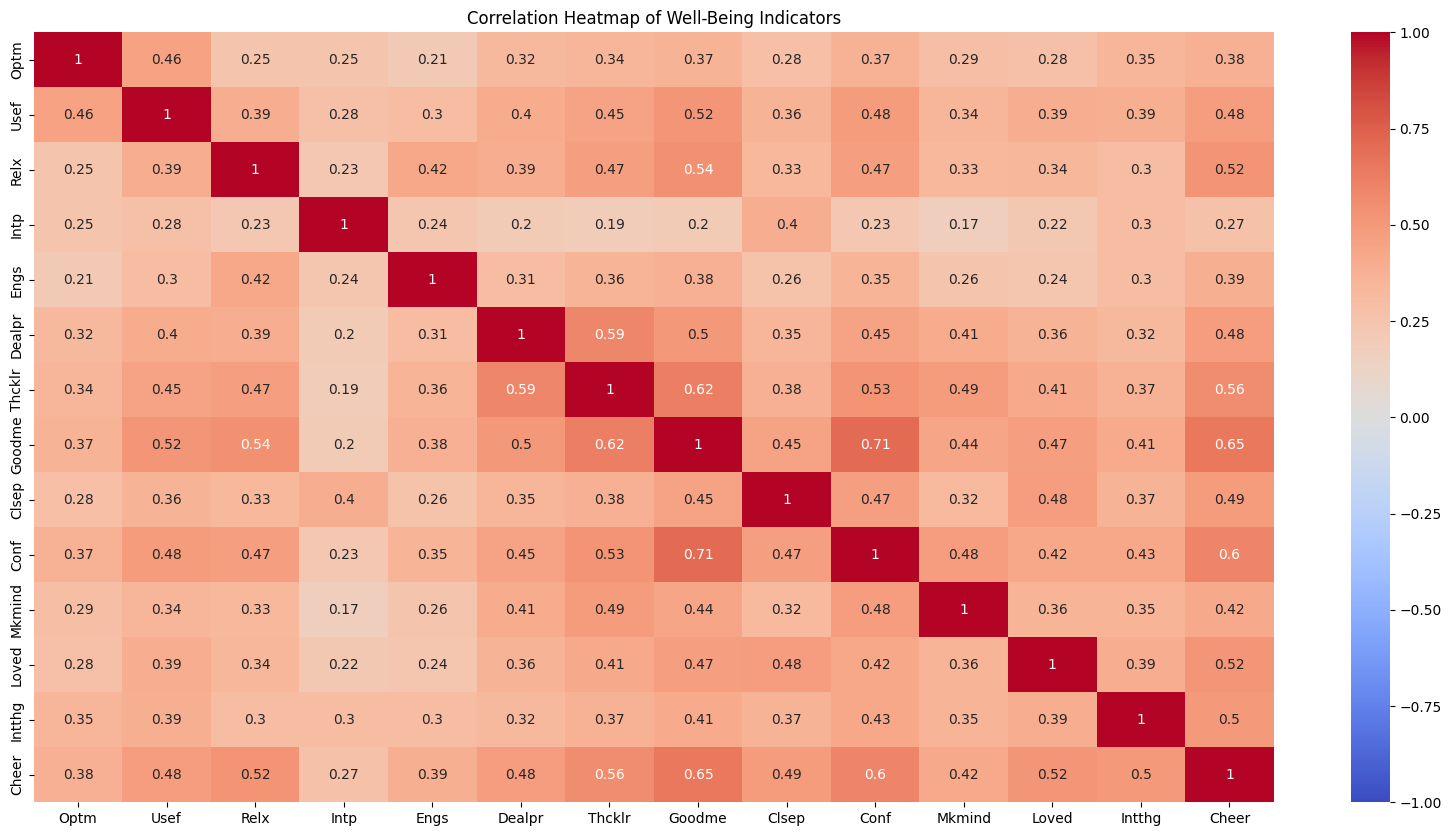

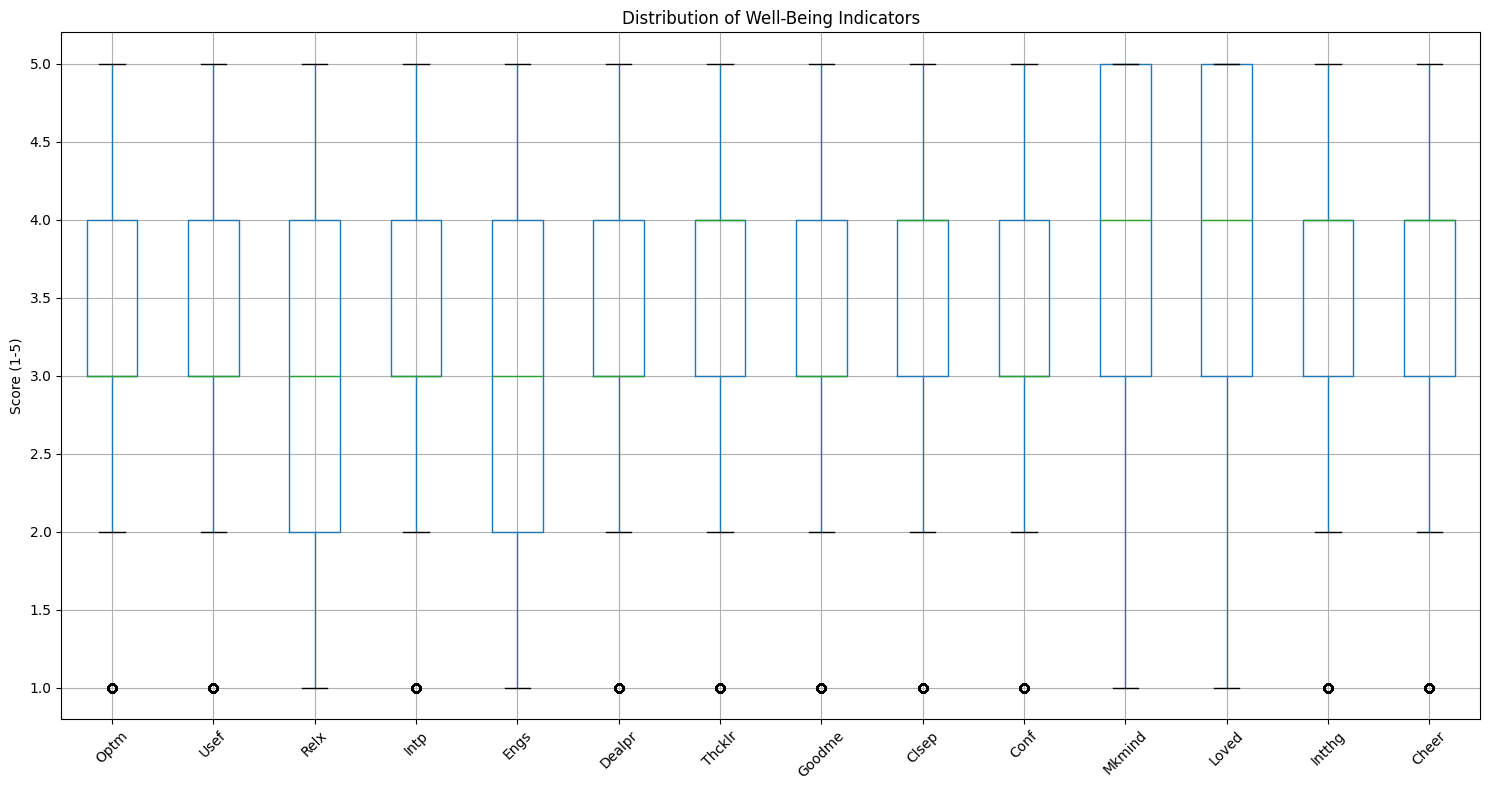

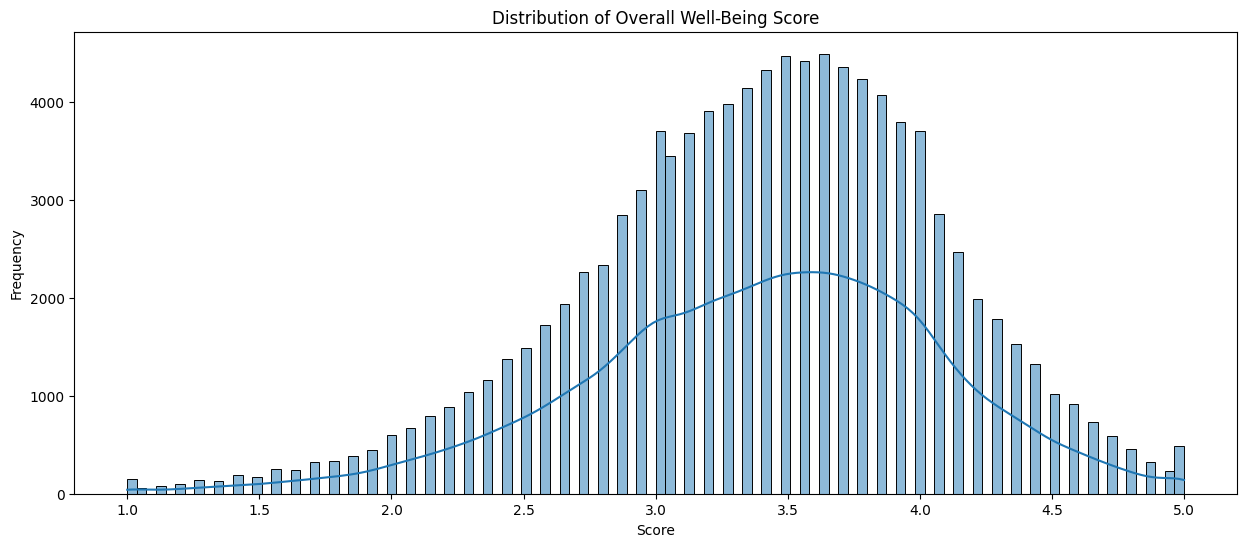


Overall Well-Being Score Statistics:
count    102580.000000
mean          3.394420
std           0.681884
min           1.000000
25%           3.000000
50%           3.428571
75%           3.857143
max           5.000000
Name: overall_wellbeing, dtype: float64


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset3 containing well-being data
dataset3 = pd.read_csv('dataset3.csv')

# List of well-being variables to analyze
wellbeing_cols = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Calculate summary statistics for well-being indicators
wellbeing_stats = dataset3[wellbeing_cols].describe()
print("Well-Being Indicator Statistics:")
print(wellbeing_stats)

# Create a heatmap of well-being indicator correlations
plt.figure(figsize=(20, 10))
sns.heatmap(dataset3[wellbeing_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Well-Being Indicators')
plt.show()

# Create box plots for each well-being indicator
plt.figure(figsize=(15, 8))
dataset3[wellbeing_cols].boxplot()
plt.title('Distribution of Well-Being Indicators')
plt.ylabel('Score (1-5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate and plot overall well-being score
dataset3['overall_wellbeing'] = dataset3[wellbeing_cols].mean(axis=1)

plt.figure(figsize=(15, 6))
sns.histplot(dataset3['overall_wellbeing'], kde=True)
plt.title('Distribution of Overall Well-Being Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

print("\nOverall Well-Being Score Statistics:")
print(dataset3['overall_wellbeing'].describe())

# Inferential Analysis 1: Correlation between Total Screen Time and Well-Being

Correlation between total screen time and Optm: -0.08 (p-value: 0.0000)
Correlation between total screen time and Usef: -0.11 (p-value: 0.0000)
Correlation between total screen time and Relx: -0.03 (p-value: 0.0000)
Correlation between total screen time and Intp: -0.02 (p-value: 0.0000)
Correlation between total screen time and Engs: -0.04 (p-value: 0.0000)
Correlation between total screen time and Dealpr: -0.10 (p-value: 0.0000)
Correlation between total screen time and Thcklr: -0.14 (p-value: 0.0000)
Correlation between total screen time and Goodme: -0.11 (p-value: 0.0000)
Correlation between total screen time and Clsep: -0.04 (p-value: 0.0000)
Correlation between total screen time and Conf: -0.08 (p-value: 0.0000)
Correlation between total screen time and Mkmind: -0.07 (p-value: 0.0000)
Correlation between total screen time and Loved: -0.09 (p-value: 0.0000)
Correlation between total screen time and Intthg: -0.08 (p-value: 0.0000)
Correlation between total screen time and Cheer: -0.

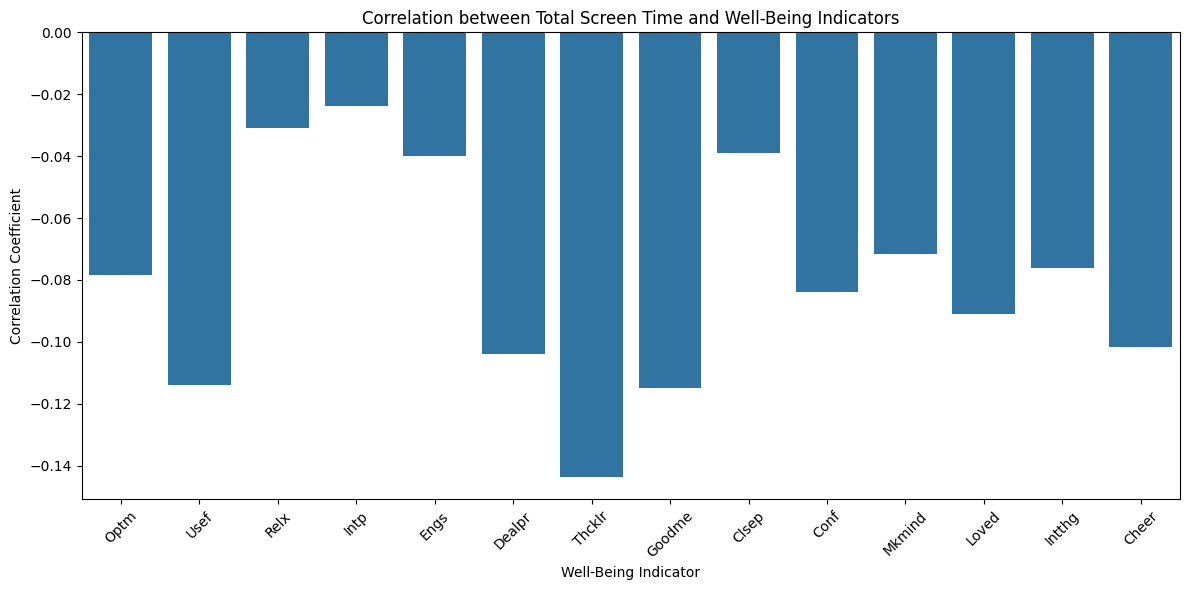

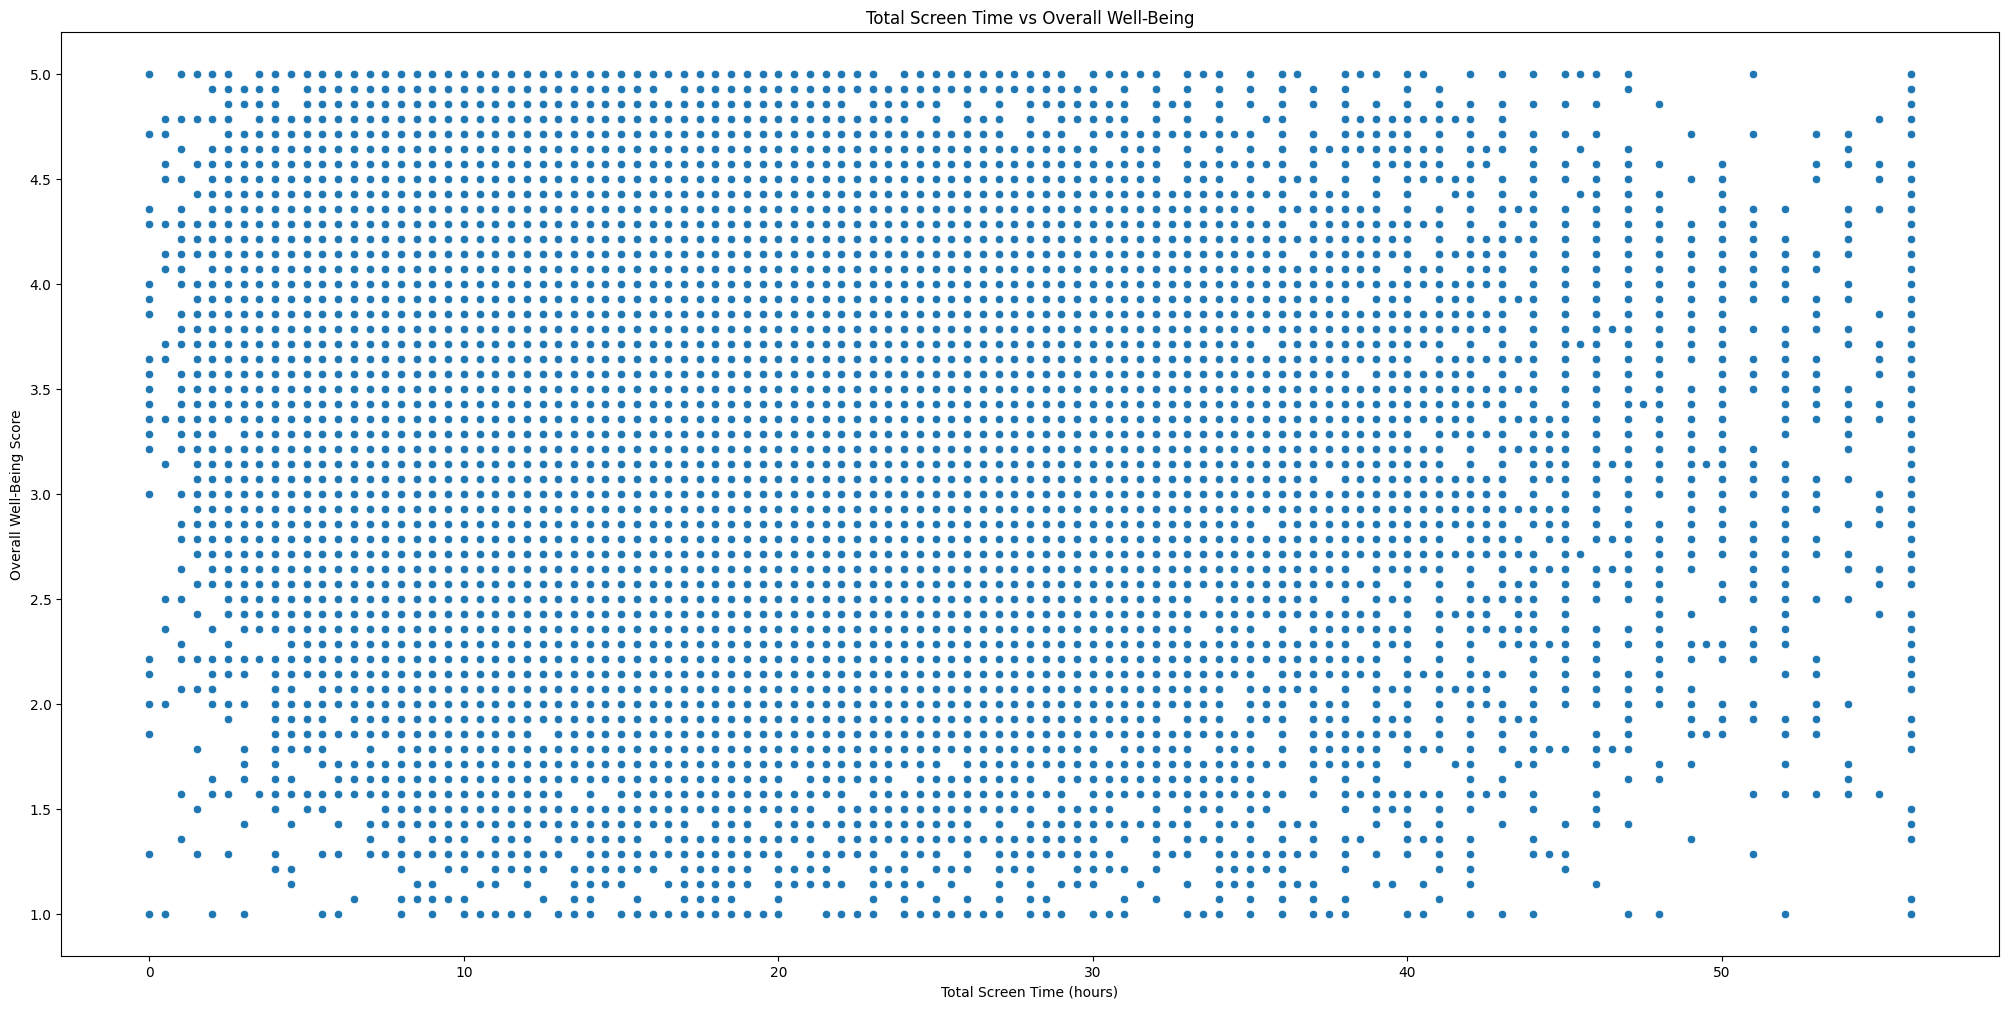

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load datasets
dataset2 = pd.read_csv('dataset2.csv')
dataset3 = pd.read_csv('dataset3.csv')

# Merge datasets on ID
merged_df = pd.merge(dataset2, dataset3, on='ID')

# Calculate total screen time
merged_df['total_screen_time'] = (
    merged_df['C_we'] + merged_df['C_wk'] +
    merged_df['G_we'] + merged_df['G_wk'] +
    merged_df['S_we'] + merged_df['S_wk'] +
    merged_df['T_we'] + merged_df['T_wk']
)

# List of well-being variables
wellbeing_cols = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Calculate correlations between total screen time and well-being indicators
correlations = []
for col in wellbeing_cols:
    corr, p_value = stats.pearsonr(merged_df['total_screen_time'], merged_df[col])
    correlations.append({'Indicator': col, 'Correlation': corr, 'P-value': p_value})
    print(f"Correlation between total screen time and {col}: {corr:.2f} (p-value: {p_value:.4f})")

# Create a bar plot of correlations
correlations_df = pd.DataFrame(correlations)
plt.figure(figsize=(12, 6))
sns.barplot(x='Indicator', y='Correlation', data=correlations_df)
plt.title('Correlation between Total Screen Time and Well-Being Indicators')
plt.xlabel('Well-Being Indicator')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot of total screen time vs overall well-being
merged_df['overall_wellbeing'] = merged_df[wellbeing_cols].mean(axis=1)
plt.figure(figsize=(25, 12))
sns.scatterplot(x='total_screen_time', y='overall_wellbeing', data=merged_df)
plt.title('Total Screen Time vs Overall Well-Being')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Overall Well-Being Score')
plt.show()

# Inferential Analysis 2: Differences in Well-Being between High and Low Screen Time Groups

Well-Being Indicator: Optm
High screen time group mean: 3.21
Low screen time group mean: 3.34
t-statistic: -20.62, p-value: 0.0000
Effect size: -0.13

Well-Being Indicator: Usef
High screen time group mean: 3.02
Low screen time group mean: 3.20
t-statistic: -30.89, p-value: 0.0000
Effect size: -0.20

Well-Being Indicator: Relx
High screen time group mean: 3.06
Low screen time group mean: 3.13
t-statistic: -10.22, p-value: 0.0000
Effect size: -0.07

Well-Being Indicator: Intp
High screen time group mean: 3.25
Low screen time group mean: 3.30
t-statistic: -7.02, p-value: 0.0000
Effect size: -0.04

Well-Being Indicator: Engs
High screen time group mean: 3.01
Low screen time group mean: 3.09
t-statistic: -11.85, p-value: 0.0000
Effect size: -0.08

Well-Being Indicator: Dealpr
High screen time group mean: 3.28
Low screen time group mean: 3.47
t-statistic: -27.79, p-value: 0.0000
Effect size: -0.18

Well-Being Indicator: Thcklr
High screen time group mean: 3.37
Low screen time group mean: 3.

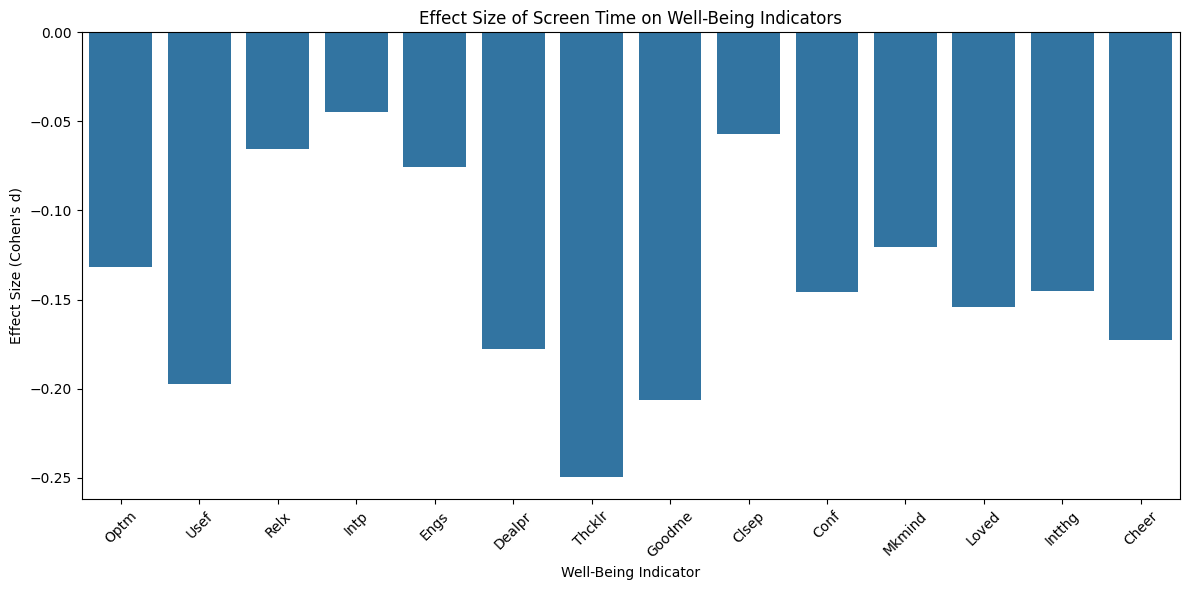

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load datasets
dataset2 = pd.read_csv('dataset2.csv')
dataset3 = pd.read_csv('dataset3.csv')

# Merge datasets on ID
merged_df = pd.merge(dataset2, dataset3, on='ID')

# Calculate total screen time
merged_df['total_screen_time'] = (
    merged_df['C_we'] + merged_df['C_wk'] +
    merged_df['G_we'] + merged_df['G_wk'] +
    merged_df['S_we'] + merged_df['S_wk'] +
    merged_df['T_we'] + merged_df['T_wk']
)

# Split into high and low screen time groups
median_screen_time = merged_df['total_screen_time'].median()
merged_df['screen_time_group'] = np.where(merged_df['total_screen_time'] >= median_screen_time, 'High', 'Low')

# List of well-being variables
wellbeing_cols = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']

# Perform t-tests and calculate effect sizes
results = []
for col in wellbeing_cols:
    high_group = merged_df[merged_df['screen_time_group'] == 'High'][col]
    low_group = merged_df[merged_df['screen_time_group'] == 'Low'][col]
    
    t_stat, p_value = stats.ttest_ind(high_group, low_group)
    effect_size = (high_group.mean() - low_group.mean()) / np.sqrt((high_group.var() + low_group.var()) / 2)
    
    results.append({
        'Indicator': col,
        'High_Mean': high_group.mean(),
        'Low_Mean': low_group.mean(),
        'T_Statistic': t_stat,
        'P_Value': p_value,
        'Effect_Size': effect_size
    })
    
    print(f"Well-Being Indicator: {col}")
    print(f"High screen time group mean: {high_group.mean():.2f}")
    print(f"Low screen time group mean: {low_group.mean():.2f}")
    print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
    print(f"Effect size: {effect_size:.2f}")
    print()

# Create a summary plot
results_df = pd.DataFrame(results)
plt.figure(figsize=(12, 6))
sns.barplot(x='Indicator', y='Effect_Size', data=results_df)
plt.title('Effect Size of Screen Time on Well-Being Indicators')
plt.xlabel('Well-Being Indicator')
plt.ylabel('Effect Size (Cohen\'s d)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()